#### World Happiness Report
#### Happiness scored according to economic production, social support, etc.
#### http://worldhappiness.report/ 



#### Source - https://www.kaggle.com/unsdsn/world-happiness

#### Andrew Yeh

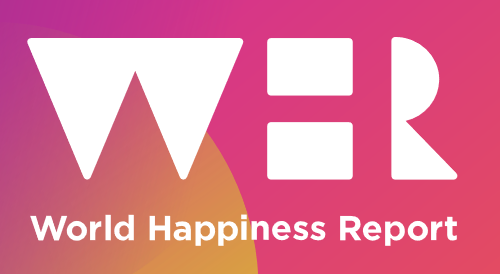

In [1]:
from IPython.display import Image
Image(filename='World Happiness Report/whr_logo.png') 

# Describe and explore your dataset

> The dataset that I am using is the World Happiness Report 2018, a survey aimed to ranking countries in terms of the “happiness” of their inhabitants.  The survey covers 158 different countries, and was repeated three times in 2015, 2016, and 2017.  The total sample size is stated to be around 3,000 people spanning across all three years.  The rankings of the countries are based on their “Happiness Score”, a simple value based on a question where the surveyed individuals were asked “How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest.”  The responses were all combined and averaged to form the score, and it is through this value that the people in charge of the dataset based the rest of their research on.  I chose this dataset to use as it deals with statistics of the numerous different countries around the world, and would be an interesting topic to delve into see the how they compare and contrast with each other.

The survey was conducted to find the correlation between the happiness of a country and 7 different categories:

>  1. Economy<br> 2. Family<br> 3. Health<br> 4. Freedom<br> 5. Trust<br> 6. Generosity<br> 7. Dystopia Residual


>  The value in each category roughly describes how much the particular category plays a part in the happiness score.  The economy category describes how much the respective nation’s GDP and average income of the population contributes to the Happiness Score, while the Family category explores the importance of strong relations between family and friends.  Health is tied to the average life expectancy of the country, and Freedom to the amount of legal freedom the citizens are guaranteed.  Trust symbolizes how much confidence the citizens have in their government to do the right thing and Generosity is how willing the citizens are to help each other.  Lastly, Dystopia Residual is how the country would fare when compared to an actual dystopia, or a country with the lowest possible values for each category.

>  The values from all 7 of these categories can be added and summed up to equal the happiness score, but the values themselves play no part in the calculations of the score itself.  They are only used to provide some insight on the rankings, and attempt to justify and explain why some countries are “happier than others”.  This data can become especially important for policy makers in government positions, as by looking at trends in the numbers they have a better idea what kind of policies would best enrich the lives of their citizens in the most efficient time possible.  As an example, if it is shown that the Family category plays the highest part in the Happiness Score, it would be beneficial to spend money on enacting government social programs.


In [8]:
import pandas as pd
import savReaderWriter as spss
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.plotly as py
import plotly as plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy.stats import ttest_ind, mannwhitneyu


init_notebook_mode(connected=True)
plotly.tools.set_credentials_file(username='ayeh64', api_key='esyYWxpyuk5GWFdgBaAp')

file_name = "World Happiness Report/2015.csv"
df_2015 = pd.read_csv(file_name)
file_name = "World Happiness Report/2016.csv"
df_2016 = pd.read_csv(file_name)
file_name = "World Happiness Report/2017.csv"
df_2017 = pd.read_csv(file_name)
# pd.concat([df_2015, df_2016, df_2017], sort=False)
df = df_2015



In [172]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# 1) Which category plays the most part in the happiness score?

> This is the most obvious question that pretty much every reader would want to know.  While there is no distinct winner, we can get a rough estimate by finding the average value of each category.


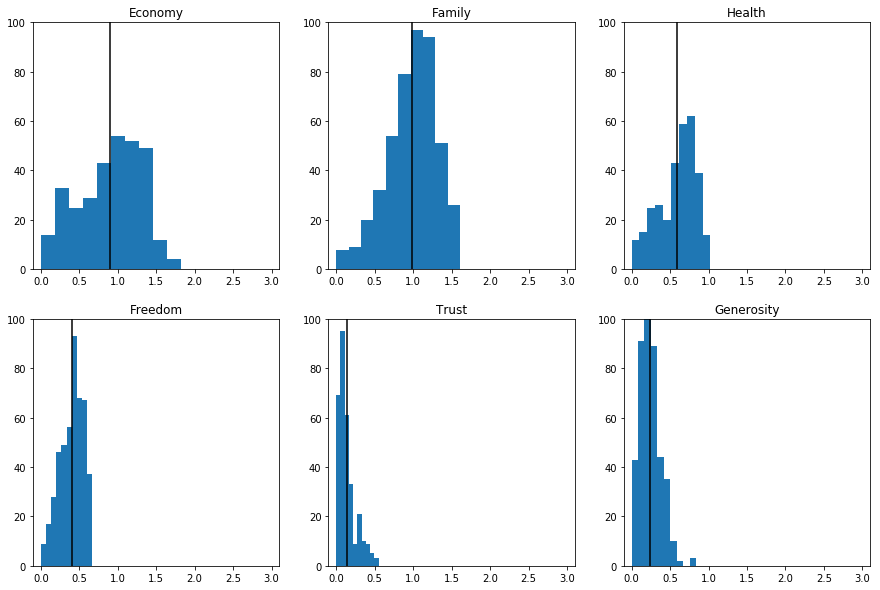

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.xlim([-0.1, 3.1])
plt.ylim([0,100])
plt.title("Economy")
plt.hist(df["Economy (GDP per Capita)"])
plt.axvline( x=np.mean(df["Economy (GDP per Capita)"]), color="black")
plt.subplot(2,3,2)
plt.xlim([-0.1, 3.1])
plt.ylim([0,100])
plt.title("Family")
plt.hist(df["Family"])
plt.axvline( x=np.mean(df["Family"]), color="black")
plt.subplot(2,3,3)
plt.xlim([-0.1, 3.1])
plt.ylim([0,100])
plt.title("Health")
plt.hist(df["Health (Life Expectancy)"])
plt.axvline( x=np.mean(df["Health (Life Expectancy)"]), color="black")
plt.subplot(2,3,4)
plt.xlim([-0.1, 3.1])
plt.ylim([0,100])
plt.title("Freedom")
plt.hist(df["Freedom"])
plt.axvline( x=np.mean(df["Freedom"]), color="black")
plt.subplot(2,3,5)
plt.xlim([-0.1, 3.1])
plt.ylim([0,100])
plt.title("Trust")
plt.hist(df["Trust (Government Corruption)"])
plt.axvline( x=np.mean(df["Trust (Government Corruption)"]), color="black")
plt.subplot(2,3,6)
plt.xlim([-0.1, 3.1])
plt.ylim([0,100])
plt.title("Generosity")
plt.hist(df["Generosity"])
plt.axvline( x=np.mean(df["Generosity"]), color="black")


plt.show()   

>  Surprisingly, the Family category has the highest average out of the categories, with a mean value of 0.99; this surprisingly beats out the most common guess, Economy, with its 0.90 average value.  From what we can tell, people hold their relationships with their friends and family in high regard.  As humans are social creatures, this data could be supporting evidence that it is important to the livelihood of citizens to have spare time and money to socialize with friends and family.  


In [15]:
df1 = df[['Country','Family']]
df1.head()

,Country,Family
0,Switzerland,1.34951
1,Iceland,1.40223
2,Denmark,1.36058
3,Norway,1.33095
4,Canada,1.32261


>  By looking at the top countries based on happiness ranking, the top 5 all have Family values very close to the max value of 1.40223, which comes from Iceland in second place.

# 2) Is there a correlation between region and happiness?

>  Pretend that we were a family that is deciding to leave their home region, and immigrate to a different one in order to settle down and start their new lives.  Assuming we ignore transportation, moving, and living costs, through the following graphs we will find which region on average should prove the most rewarding in the longterm.


In [117]:
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Happiness Index', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))

fig = dict( data=[data], layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ayeh64/0 or inside your plot.ly account where it is named 'd3-world-map'


>  Using this heat map, we can tell that in general, continents roughly have the same happiness score.  Particularily North America, Europe, and Australia all have paritcularily high hues of the same color , while Asia and Africa have varied hues of middle and lower colors.

Text(0.5, 0, '')

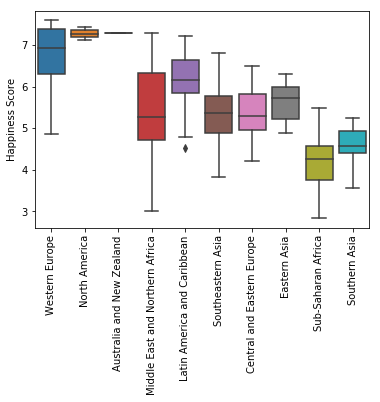

In [174]:
regions = sns.boxplot(y=df["Happiness Score"], x=df["Region"])
plt.xticks(rotation=90)
regions.set_xlabel('')

>  A boxplot of the regions shows us the distribution of happiness in the regions, which shows us that North America, Australia, and New Zealand have an incredibly small range of values, mostly given to their low sample count.  Thus we should treat them as outliers for the most part.  The Middle East and Northern Africa region has the greatest range, with values the rank near the top as well as the bottom.  However judging from its quartiles, most of its values are still considered average.  We can also tell from the graph that every region has at least one country that is above a happiness score of 5, but there are a couple regions in particular, mainly Sub-Saharan Africa and Southern Asia, that have quartiles with very low happiness scores.

Text(0.5, 0, '')

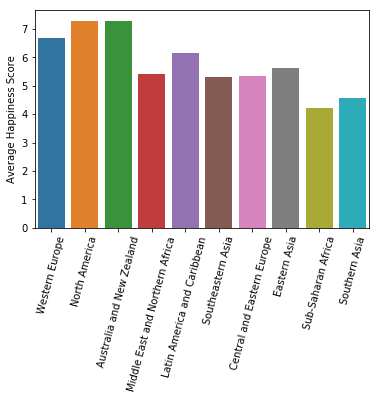

In [178]:
regions = df['Region'].unique()
reg = [0] * 10

for n in range(10):
    reg[n] = np.mean(df[df['Region'] == regions[n]]['Happiness Score'])

tests = pd.DataFrame()
tests["Region"] = regions
tests["Average Happiness Score"] = reg
ax = sns.barplot(x="Region",y="Average Happiness Score", data=tests)
plt.xticks(rotation=75)
ax.set_xlabel('')

>  From this boxplot, we can see the average happiness scores from each reason.  Unsurpringly, both North America and Australia and New Zealand have the highest averages.  Western Europe is a bit behind too, followed by Latin America and Caribbean.

In [9]:
ttest_ind(df[df.Region=="Western Europe"]["Happiness Score"], df[df.Region=="Sub-Saharan Africa"]["Happiness Score"])

Ttest_indResult(statistic=13.374348124815134, pvalue=1.6300382933859878e-19)

>  Next we will run a T-Test as an assurance for our conclusion.  We will take the Happiness Scores of two regions, Western Europe and Sub-Saharan Africa in this example, and run the test to view how much their values vary.  Unsurprisingly, we ended up with a high statistic, while the pvalue was incredibly small, at a 1.6e-19.

(array([2., 1., 2., 7., 7., 5., 9., 2., 3., 2.]),
 array([2.839 , 3.1028, 3.3666, 3.6304, 3.8942, 4.158 , 4.4218, 4.6856,
        4.9494, 5.2132, 5.477 ]),
 <a list of 10 Patch objects>)

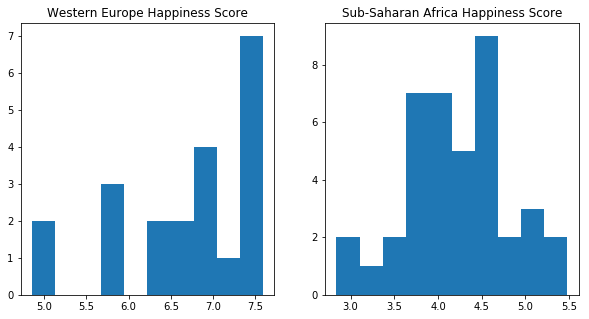

In [14]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Western Europe Happiness Score")
plt.hist(df[df.Region=="Western Europe"]["Happiness Score"])
plt.subplot(1,2,2)
plt.title("Sub-Saharan Africa Happiness Score")
plt.hist(df[df.Region=="Sub-Saharan Africa"]["Happiness Score"])

>  However since we know that T-Test are mainly used on normal datasets, we must double-check if the two datasets qualify.  From our histogram tests up above, we can tell that neither of the two list of values are normal, specifically the Happiness Score of Western Europe as its values lean more to the right than in the center.  Because of this, our T-Test values may be inaccurate.

In [188]:
mannwhitneyu(df[df.Region=="Western Europe"]["Happiness Score"], df[df.Region=="Sub-Saharan Africa"]["Happiness Score"])

MannwhitneyuResult(statistic=10.0, pvalue=2.5503968836928885e-10)

>  To be safe, we will also run the Mannwhitneyu test.  From our results, we can tell that while the statistic is lower and the pvalue is much higher, they still signify that the difference between the two is significant enough to warrant discussion.

>  From these graphs we can make some good guesses on regions that would give us a high chance of finding a happy country to reside in.  The top of our list is North America, Australia, and New Zealand.  These regions have a very low country count, yet all of them rank very high on the happiness scale.  Thus no matter where you go in the region, you will have a large chance to end up "happy".  Western Europe is the other option as well.  It has a high average happines, but it does suffer from having an extraordinarily high country count that it covers, as its wide range grants it many high ranking and low ranking countries.  Luckily however, judging from the boxplot diagrams, we can tell that the majority of the ranges have higher than average happiness scores, so there's still a high chance that you will end up in a good country.

# 3) Are there correlations between certain factors?

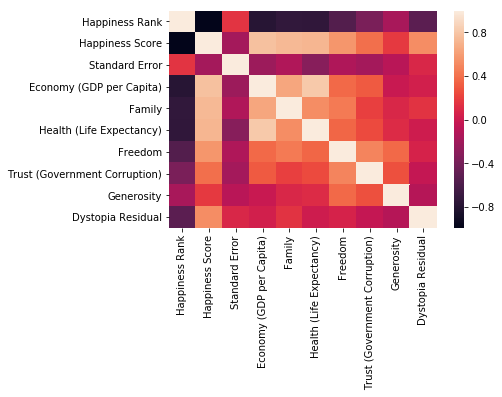

In [168]:
sns.heatmap(df.corr())

In [169]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


>  This heatmap tell us much about the differet types of correlation between the factors.  The Happiness Score is HEAVILY based on the first three factors, namely Economy, Family, and Health.  Right off the bat we can tell that these three factors are the pillars of a happy society.  Looking further, we can tell that the Economy factor is also very high in correlation to the others, signifying that a high economy factor in turns raises the values of the others.  A strong economy means more access to resources, which also leads to healthier lifestyles and more time to spend with family.  Those that are happy will also be more willing to look over less freedom as well as some government corruption.  On the other hand, surprisingly Generosity is more or less the opposite, as it has the least correlation with the others.  This topic is an interesting one and should warrant further studies.  However in conclusion, a simple statement could be made that countries with strong economies simply tend to be happier so to say.

# Conclusion

>  While outliers do exist, we can more or less form a conclusion on the factors that lead to a country being considered a good place to live by its inhabitants.  The single undisputed factor is most likely a country's economy, as rich countries consistently do much well off than others in terms of happiness score and rankings.  That is not to say that countries that have investments in family supports and health are not doing well either, as these three factors are the main difference between a happy and an unhappy country.

# Next Step

>  In terms of research that could be further done, I personally feel like more comparisons between the different years would give a MUCH bigger picture on living conditions, especially how they can change over time.  Sadly with my current capabilities, this proves to be quite difficult as I am not sure how to deal with inconsistencies in the dataset's data collection, as well as how to avoid showcasing the data in its cluttered state.  I hope to be able to learn techniques to make more plots much neater and pleasing to the eye, and possibly be able to utilize a larger variety of plot types that I can use to better suit the situation.